# Instalando dependências


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Carregando o dataset

In [6]:
!unzip /content/cats_and_dogs.zip -d /content/

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/training_set/training_set/cats/cat.3715.jpg  
  inflating: /content/training_set/training_set/cats/cat.3

In [7]:
!ls /content

cats_and_dogs.zip  sample_data	test_set  training_set


In [8]:
train_dir = '/content/training_set/training_set'
test_dir   = '/content/test_set/test_set'

# Pré-processamento das imagens

In [9]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# Criando o modelo com ResNet50

In [10]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Compilando o modelo

In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Treinando o modelo

In [13]:
epochs = 10

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 127s 456ms/step - accuracy: 0.9089 - loss: 0.2195 - val_accuracy: 0.9867 - val_loss: 0.0429
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 103s 412ms/step - accuracy: 0.9827 - loss: 0.0464 - val_accuracy: 0.9852 - val_loss: 0.0352
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 404ms/step - accuracy: 0.9877 - loss: 0.0364 - val_accuracy: 0.9867 - val_loss: 0.0340
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 401ms/step - accuracy: 0.9886 - loss: 0.0312 - val_accuracy: 0.9852 - val_loss: 0.0359
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 404ms/step - accuracy: 0.9910 - loss: 0.0246 - val_accuracy: 0.9901 - val_loss: 0.0323
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 102s 406ms/step - accuracy: 0.9922 - loss: 0.0217 - val_accuracy: 0.9896 - val_loss: 0.0318
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 400ms/step - accuracy: 0.9914 - loss: 0.0241 - val_accuracy: 0.9876 - val_loss: 0.0317
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 102s 406ms/step - accuracy: 0.9909 -

# Visualizando resultados

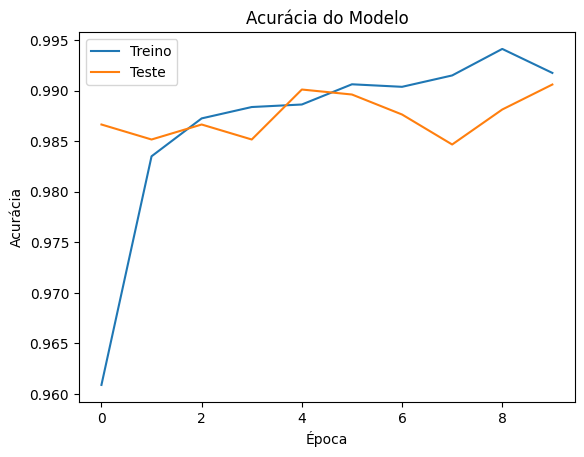

In [15]:
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Teste')
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()